In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [39]:
data.shape

(213, 11)

In [40]:
# we can see the names of columns being missing so lets add the names

In [41]:
data.rename(columns = {'1.52101' : 'RI'},inplace = True)

In [42]:
data.rename(columns = {'13.64' : 'Na'},inplace = True)

In [43]:
data.rename(columns = {'4.49' : 'Mg'},inplace = True)

In [44]:
data.rename(columns = {'1.10' : 'Al'},inplace = True)

In [45]:
data.rename(columns = {'71.78' : 'Si'},inplace = True)

In [46]:
data.rename(columns = {'0.06' : 'K'},inplace = True)

In [47]:
data.rename(columns = {'8.75' : 'Ca'},inplace = True)

In [48]:
data.rename(columns = {'0.00' : 'Ba'},inplace = True)

In [49]:
data.rename(columns = {'0.00.1' : 'Fe'},inplace = True)

In [50]:
data.rename(columns = {'1.1' : 'Type of Glass'},inplace = True)

In [51]:
data = data.drop(columns = ['1'])
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [52]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [53]:
data.shape

(213, 10)

In [54]:
# we need to catagorise the type of glasses.

In [55]:
data['Type of Glass'] = data['Type of Glass'].replace(1,0)

In [56]:
data['Type of Glass'] = data['Type of Glass'].replace(2,0)

In [57]:
data['Type of Glass'] = data['Type of Glass'].replace(3,0)

In [58]:
data['Type of Glass'] = data['Type of Glass'].replace(4,0)

In [59]:
data['Type of Glass'] = data['Type of Glass'].replace(5,1)

In [60]:
data['Type of Glass'] = data['Type of Glass'].replace(6,1)

In [61]:
data['Type of Glass'] = data['Type of Glass'].replace(7,1)

In [62]:
# Here in data 0 means 'window glass' where as 1 means 'non-window glass'

In [63]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,0.239437
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,0.427745
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,0.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,0.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [64]:
# There are no nan values. Lets check for outliers if there are any .

In [65]:
# Lets check for outliers if there are any

In [66]:
# We will be using graph to understand the situaton of outliers here.

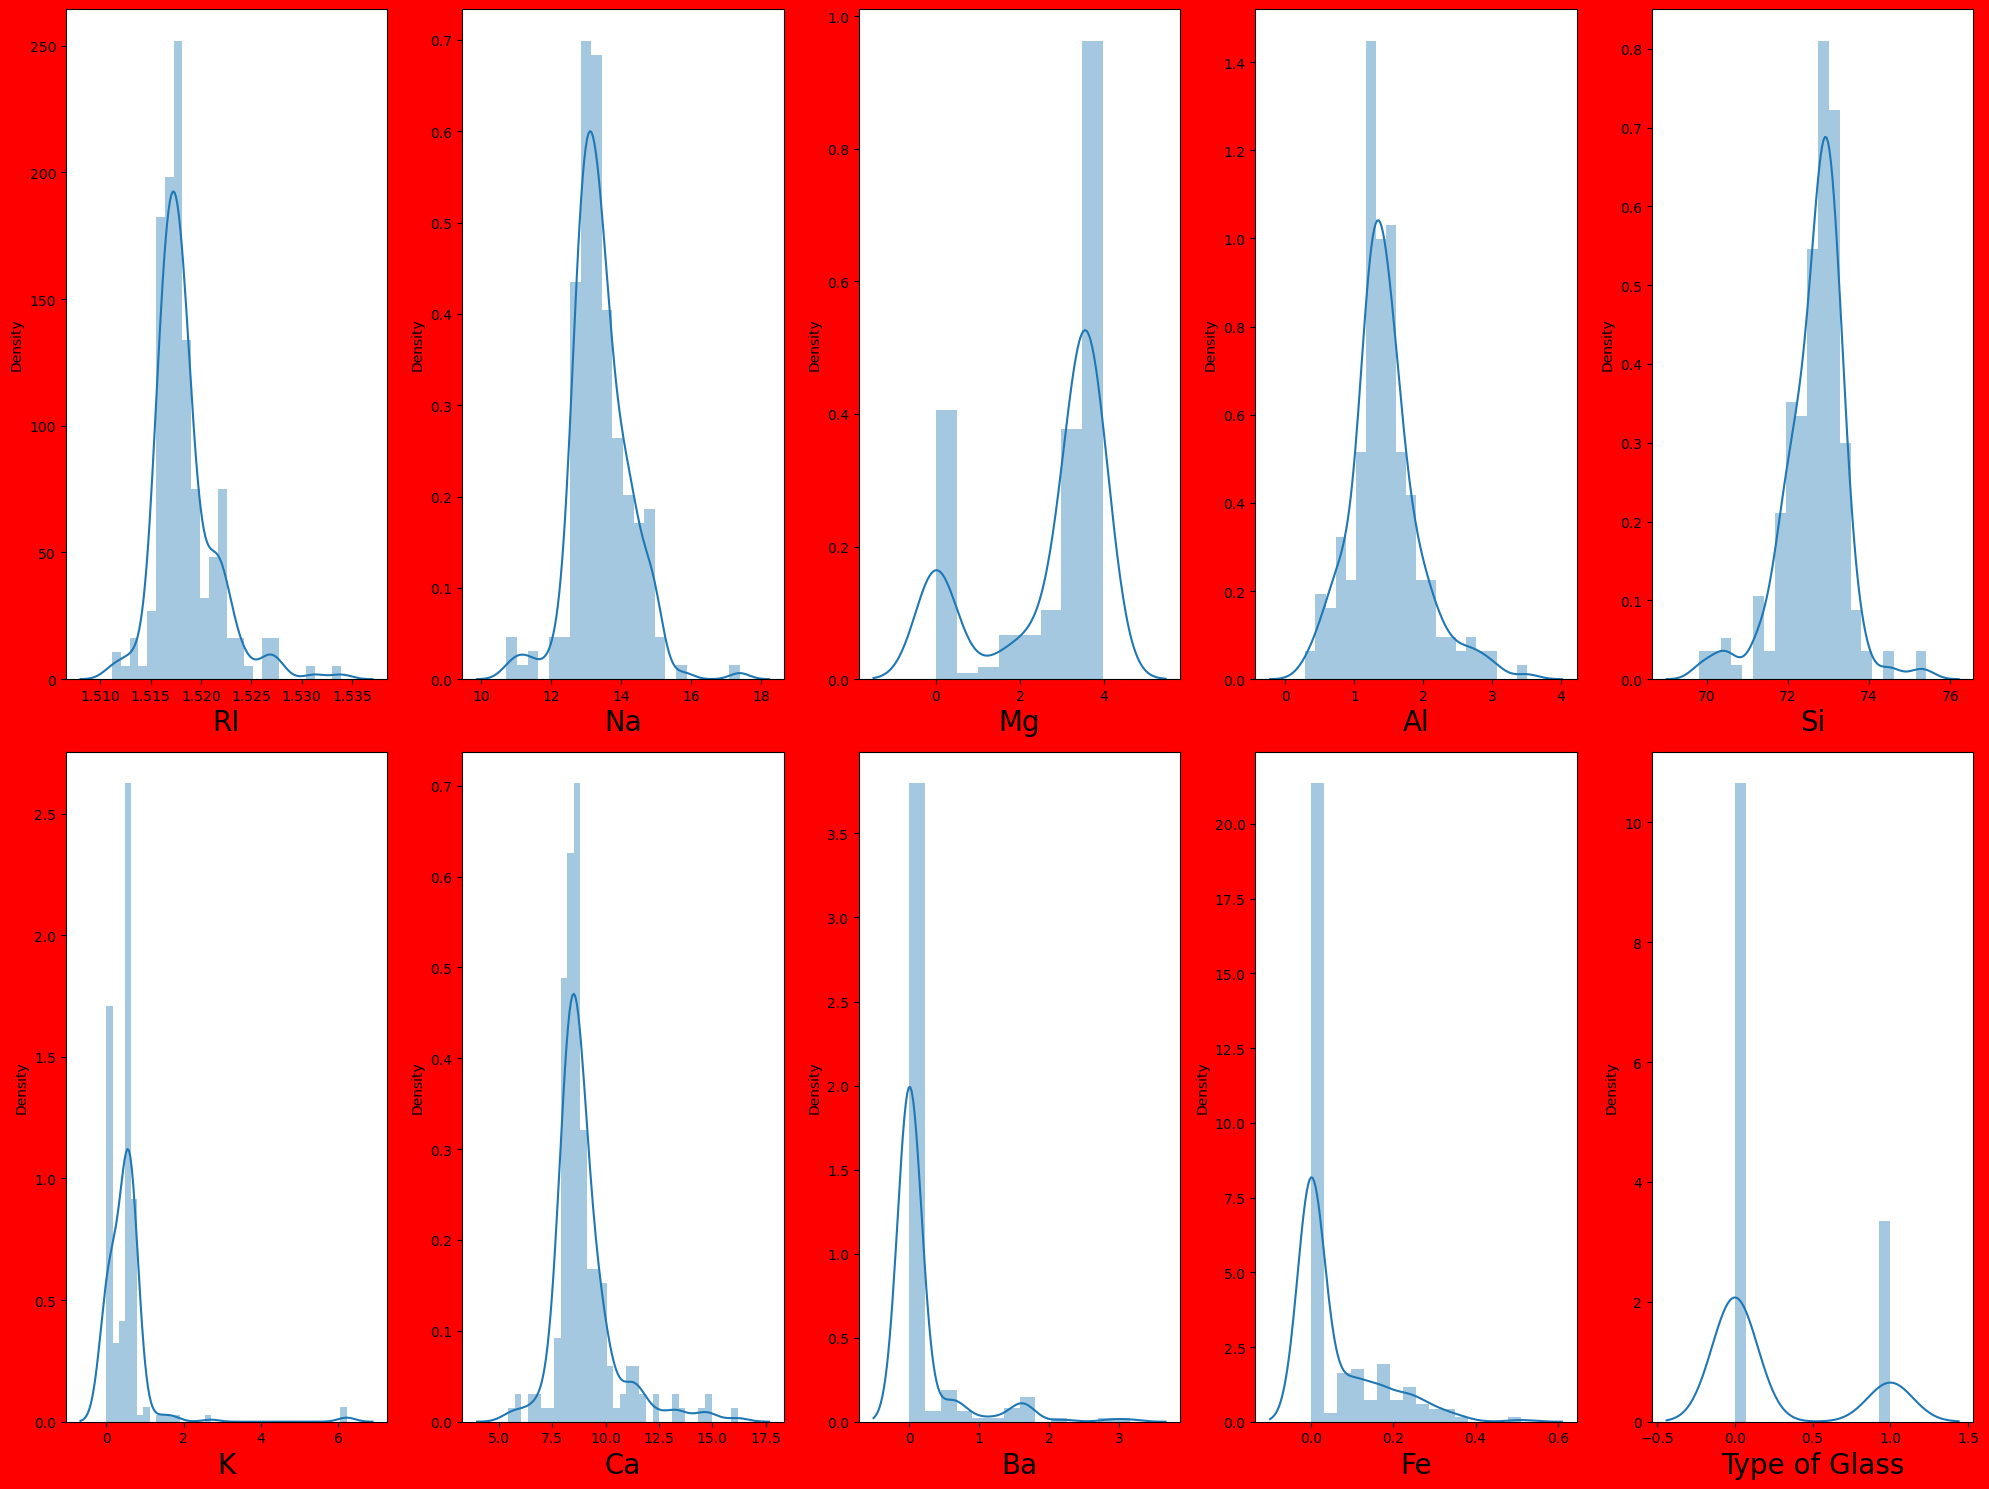

In [67]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax = plt.subplot(2,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [68]:
# some skewdness can be seen lets confirm through boxplot

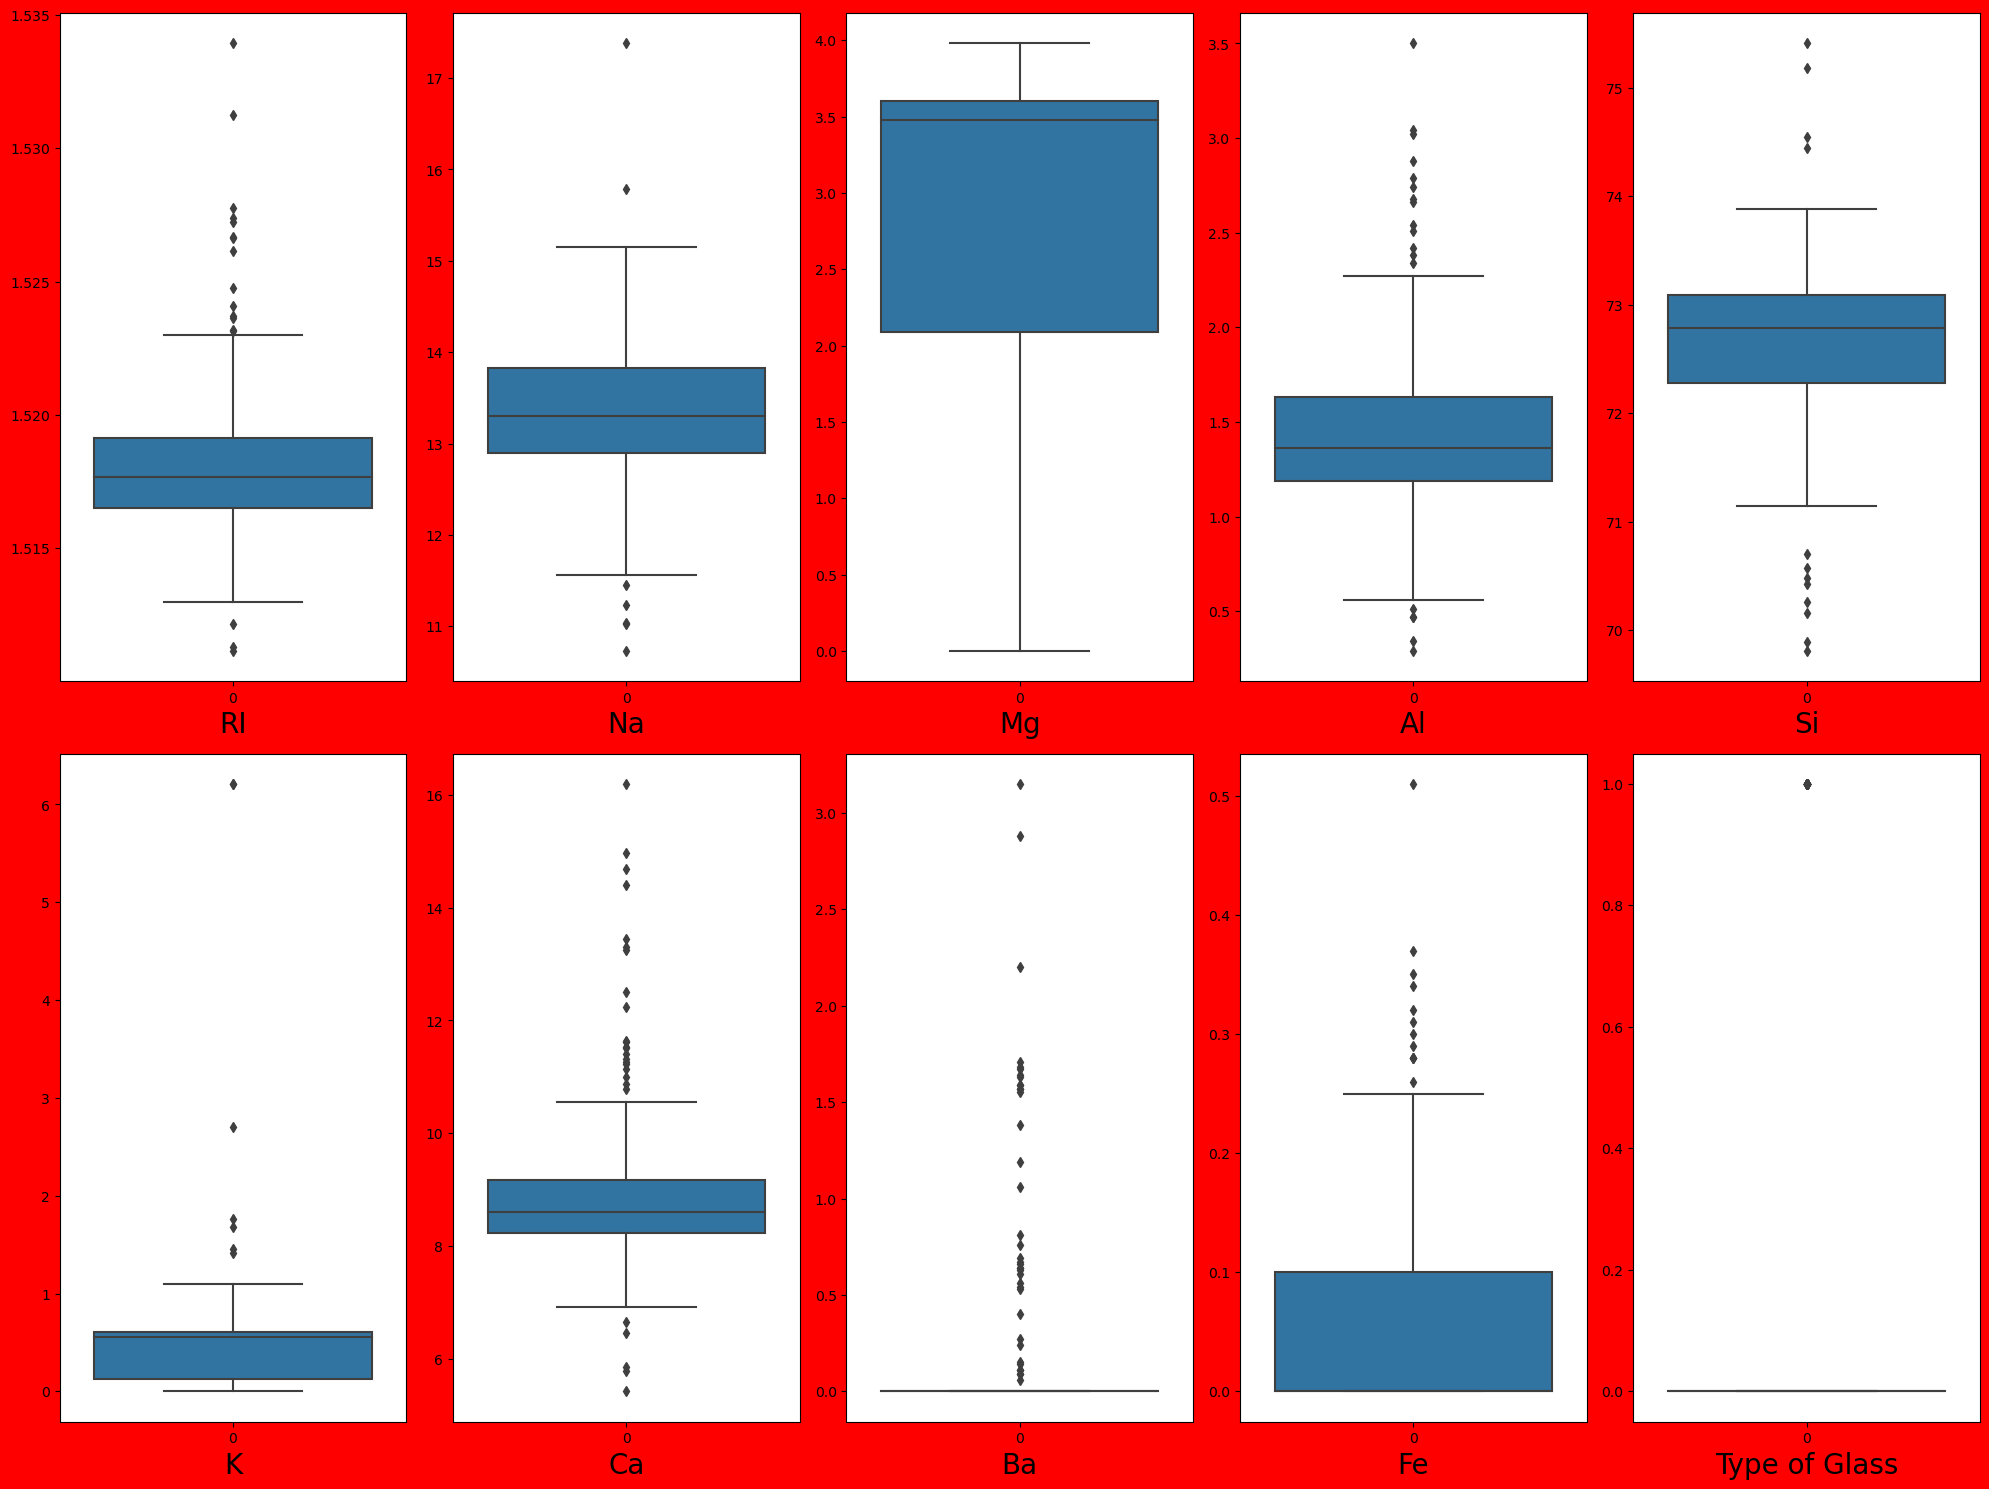

In [69]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=10:
        plt.subplot(2,5,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [ ]:
# Some skewdness can be found.

In [ ]:
# we cannot treate skewdness we cannot afford data loss

In [ ]:
# lets divide data into feature and label.

In [70]:
y = data['Type of Glass']
x = data.drop(columns = ['Type of Glass'])

In [71]:
y

0      0
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    1
211    1
212    1
Name: Type of Glass, Length: 213, dtype: int64

In [72]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


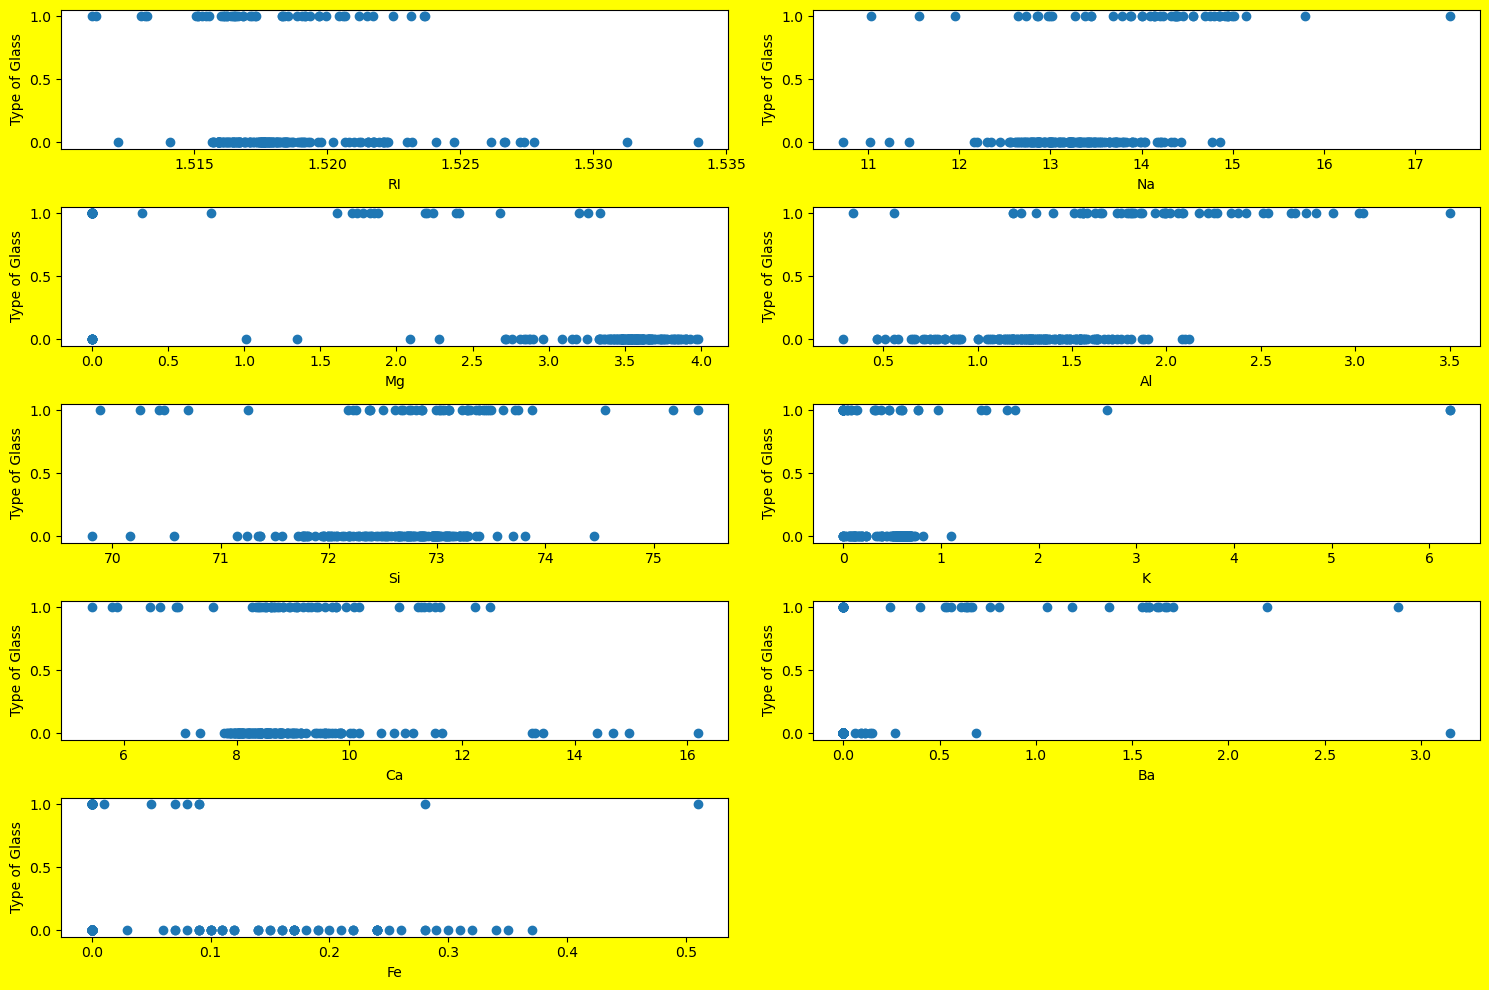

In [73]:
plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Type of Glass',fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [74]:
# Data scaling.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[-0.2451006 ,  0.59188032,  0.64293659, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-0.71682556,  0.15094587,  0.60814353, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-0.22860672, -0.24099586,  0.7055641 , ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 0.75772729,  1.16754474, -1.8621639 , ..., -0.36395239,
         2.94550057, -0.58830108],
       [-0.60796596,  1.19204109, -1.8621639 , ..., -0.33584439,
         2.80467644, -0.58830108],
       [-0.4100394 ,  1.00831841, -1.8621639 , ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [75]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,9.512636,RI
1,61.800820,Na
2,206.400829,Mg
3,25.629094,Al
4,57.871368,Si
5,43.577914,K
6,211.664529,Ca
7,26.151119,Ba
8,1.219902,Fe


In [76]:
# Now we will do train, test, split.

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25, random_state = 355)

In [78]:
# Model building.

In [79]:
y_train.head()

96     0
71     0
128    0
187    1
68     0
Name: Type of Glass, dtype: int64

In [80]:
# Model Building.

In [81]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [82]:
data.tail(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
211,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,1
212,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,1


In [84]:
regression.predict(scaler.transform([[1.23765, 12.36, 0.1, 2.94, 80.23, 0.0, 7.23, 2.00, 0.0]]))

array([-3.02399059])

In [85]:
# How our model perform with test data .

In [86]:
regression.score(x_test,y_test)

0.43959204233304083

In [87]:
regression.score(x_train,y_train)

0.8055317580582803